In [1]:
# Import all the required libraries to create a Decision Tree Regressor Model

import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score

In [2]:
# Import data set
Data = pd.read_csv(r"C:\Users\Vinoth\Desktop\HOPE AI\Machine Learning\ML_Regression_Assignment_Insurance_Data\DataSet\insurance_pre.csv")

In [3]:
Data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


## From above input we can see that there are two category columns and four numerical columns

In [4]:
Data.shape

(1338, 6)

## From above input we can see that there are 1338 rows and 6 columns


In [5]:
# Check if there is any NA values in the data set
Data[Data.isna().any(axis=1)]

,age,sex,bmi,children,smoker,charges


In [6]:
Data[Data.isnull().any(axis=1)]

,age,sex,bmi,children,smoker,charges


## From above two commands we can see there is no any NA/Null values in the dataset

In [7]:
# Lets convert the Nominal categorical columns to numeric columns via one-hot encoding using get_dummies method using pandas

Data = pd.get_dummies(Data,drop_first=True)

In [8]:
Data.head()

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0


In [9]:
# Re-arrange the columns for better visuslaization 

Data = Data.loc[:,['age','bmi','children','sex_male','smoker_yes','charges']]

In [10]:
Data.head()

,age,bmi,children,sex_male,smoker_yes,charges
0,19,27.900,0,0,1,16884.92400
1,18,33.770,1,1,0,1725.55230
2,28,33.000,3,1,0,4449.46200
3,33,22.705,0,1,0,21984.47061
4,32,28.880,0,1,0,3866.85520


In [11]:
# Lets split data into dependent/output and independent/Input Variables

dependent = Data[['charges']]
independent = Data[['age','bmi','children','sex_male','smoker_yes']]

In [12]:
dependent.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [13]:
independent.head()

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0


In [14]:
# Convert the all the columns values into same scale using standardization

std = StandardScaler()
independent = std.fit_transform(independent)

In [15]:
independent

array([[-1.43876426, -0.45332   , -0.90861367, -1.0105187 ,  1.97058663],
       [-1.50996545,  0.5096211 , -0.07876719,  0.98959079, -0.5074631 ],
       [-0.79795355,  0.38330685,  1.58092576,  0.98959079, -0.5074631 ],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, -1.0105187 , -0.5074631 ],
       [-1.29636188, -0.79781341, -0.90861367, -1.0105187 , -0.5074631 ],
       [ 1.55168573, -0.26138796, -0.90861367, -1.0105187 ,  1.97058663]])

In [16]:
# converting independent back to data frame for visualizing the data

independent = pd.DataFrame(independent,columns=['age','bmi','children','sex_male','smoker_yes']) 

In [17]:
independent.head()

,age,bmi,children,sex_male,smoker_yes
0,-1.438764,-0.453320,-0.908614,-1.010519,1.970587
1,-1.509965,0.509621,-0.078767,0.989591,-0.507463
2,-0.797954,0.383307,1.580926,0.989591,-0.507463
3,-0.441948,-1.305531,-0.908614,0.989591,-0.507463
4,-0.513149,-0.292556,-0.908614,0.989591,-0.507463


In [18]:
# Lets divide the training and test data for creating and testing the model

X_Train,X_Test,Y_Train,Y_Test = train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [19]:
X_Train.shape

(936, 5)

In [20]:
X_Test.shape

(402, 5)

In [21]:
# Lets create the model using the training data

Decision_Tree_Regressor_Model = DecisionTreeRegressor()
Decision_Tree_Regressor_Model.fit(X_Train,Y_Train)

DecisionTreeRegressor()

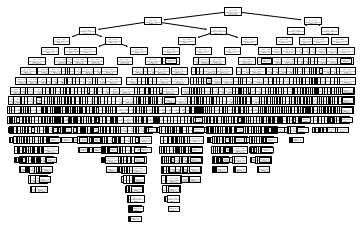

In [22]:
#PLotting the decision tree model created
import matplotlib.pyplot as plt
plot_tree(Decision_Tree_Regressor_Model)
plt.show()

In [23]:
# Test the model using our test data

predicted_y = Decision_Tree_Regressor_Model.predict(X_Test)

In [24]:
# Lets validate the R_score value

R2_Score = r2_score(Y_Test,predicted_y)

In [25]:
R2_Score

0.6973038000494427

## Lets try to create the evaluation metric grid/table with different parameter options

In [81]:
Columns = ['S.NO','criterion','splitter','max_features','R2_Value']
criterion = ['squared_error', 'friedman_mse', 'absolute_error']
splitter = ['best','random']
max_features=['auto','sqrt','log2']

In [90]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
# from sklearn.exceptions import DataConversionWarning
# warnings.filterwarnings("ignore", category=DataConversionWarning)
Final_Series =[]
S_No = 1
Greater_R2_Score = 0
High_Performance_Comb = []
Final_Series =[]
for c in criterion:
    for s in splitter:
        for m in max_features:
            dummy_Series=[]
            dummy_Series.append(S_No)
            dummy_Series.append(c)
            dummy_Series.append(s)
            dummy_Series.append(m)
            Decision_Tree_Regressor_Model = DecisionTreeRegressor(criterion=c,splitter=s,max_features=m)
            Decision_Tree_Regressor_Model.fit(X_Train,Y_Train)
            Predicted_Y = Decision_Tree_Regressor_Model.predict(X_Test)
            R2_score = r2_score(Y_Test,Predicted_Y)
            dummy_Series.append(R2_score)
            if R2_score > Greater_R2_Score:
                R2_Series = []
                Greater_R2_Score=R2_score
                High_Performance_Col =['S.NO','criterion',"splitter",'max_features','R2_score']
                R2_Series.append(S_No)
                R2_Series.append(c)
                R2_Series.append(s)
                R2_Series.append(m)
                R2_Series.append(Greater_R2_Score)
                High_Performance_Comb=np.array(R2_Series)
                #print(High_Performance_Comb)
            else:
                pass
            Final_Series.append(dummy_Series)
            S_No = S_No+1
Final_Series
Model_Evaluation = pd.DataFrame(np.array(Final_Series),columns=Columns)
Model_Evaluation = Model_Evaluation.astype({'S.NO':'int'})
Model_Evaluation
High_Performance = pd.DataFrame([High_Performance_Comb],columns=High_Performance_Col)
High_Performance = High_Performance.astype({'S.NO':'int'})
Model_Evaluation

,S.NO,criterion,splitter,max_features,R2_Value
0,1,squared_error,best,auto,0.6992637683818983
1,2,squared_error,best,sqrt,0.7369024264237592
2,3,squared_error,best,log2,0.6527324961162786
3,4,squared_error,random,auto,0.7306255229341017
4,5,squared_error,random,sqrt,0.718519894169253
5,6,squared_error,random,log2,0.6493332498454322
6,7,friedman_mse,best,auto,0.7014865295914485
7,8,friedman_mse,best,sqrt,0.7002681506264155
8,9,friedman_mse,best,log2,0.7340822861135674
9,10,friedman_mse,random,auto,0.7007059166483409


In [91]:
High_Performance

,S.NO,criterion,splitter,max_features,R2_score
0,16,absolute_error,random,auto,0.7455708497901046


In [93]:
Decision_Tree_Regressor_Model = DecisionTreeRegressor(criterion="absolute_error",splitter="random",max_features="auto")
Decision_Tree_Regressor_Model.fit(X_Train,Y_Train)
Predicted_Y = Decision_Tree_Regressor_Model.predict(X_Test)
R2_score = r2_score(Y_Test,Predicted_Y)

In [94]:
# Save the model using pickle
pickle.dump(Decision_Tree_Regressor_Model,open(r"C:\Users\Vinoth\Desktop\\HOPE AI\Machine Learning\ML_Regression_Assignment_Insurance_Data\Final Models\Decision_Tree_Regressor_Model_Final.sav",'wb'))